In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df = df.dropna()

In [5]:
df = df.drop_duplicates()

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


(array([365., 349., 290., 109., 110.,  56.,  52.,  18.,  54.,  67.]),
 array([ 1009.,  2908.,  4807.,  6706.,  8605., 10504., 12403., 14302.,
        16201., 18100., 19999.]),
 <a list of 10 Patch objects>)

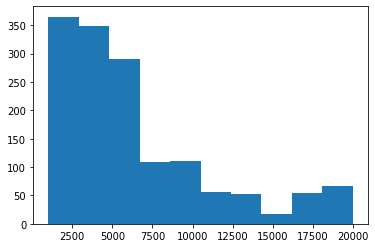

In [7]:
plt.hist(df.MonthlyIncome)

In [8]:
df.MonthlyIncome.skew()

1.3698166808390662

# Monthly Salary is Not-Normaly Distributed (Skew != 0)

In [9]:
# Encoding Attrition Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Attrition = le.fit_transform(df.Attrition)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
#taking all the data which is having Attrition as yes
df_attr_yes = df[df["Attrition"] == 1]
df_attr_yes.head()
print(df_attr_yes.shape)

(237, 35)


In [11]:
# taking all the data which is having Attrition as No
df_attr_no = df[df["Attrition"] == 0]
df_attr_no.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


# Attrition and Monthly Income
H0: There is no Significant difference in monthly income of the ppl who left and the ppl who stayed

H1: There is Significant difference in monthly income of he ppl who left and the ppl who stayed

Mann whitney Test

In [12]:
from scipy.stats import mannwhitneyu
stats,p = mannwhitneyu(df_attr_yes.MonthlyIncome,df_attr_no.MonthlyIncome)
print(stats,p)
if p<0.5:
    print("Reject H0")
else:
    print("Accept H0")

100620.5 1.4754154586444366e-14
Reject H0


Hence:
There is Significant difference in monthly income of the ppl who left and the ppl who stayed

# Gender And Attrition
H0: There is no Dependancy

H1: There is Dependancy

In [13]:
#to check dependancy
from scipy.stats import chi2_contingency

chi_table = pd.crosstab(df.Attrition,df.Gender)
print(chi_table)

Gender     Female  Male
Attrition              
0             501   732
1              87   150


In [14]:
stats , p,dof,expected = chi2_contingency(chi_table)

print(stats,p)
if p<0.05:
    print("Reject H0")
else:
    print("Accept H0")

1.1169671241970975 0.29057244902890855
Accept H0


Hence:
H0: There is no Dependancy


# Distance from home of the people who left and Distance from home of People who Stayed
H0: There is no Significant difference in DistanceFromHome of The people who left and the people who stayed

H1: There is Significant difference in DistanceFromHome of The people who left and the people who stayed

Mann whitney Test

In [22]:
from scipy.stats import mannwhitneyu
stats,p = mannwhitneyu(df_attr_yes.DistanceFromHome,df_attr_no.DistanceFromHome)
print(stats,p)
if p<0.05:
    print("Reject H0")
else:
    print("Accept H0")

127995.5 0.0011935235136813992
Reject H0


There is Significant difference in DistanceFromHome of The people who left and the people who stayed

(array([68., 26., 39., 21., 10., 17., 11., 14., 21., 10.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

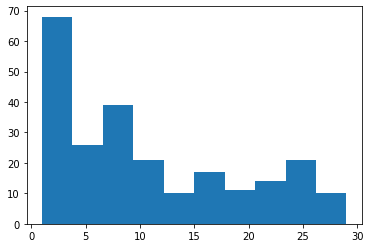

In [17]:
plt.hist(df_attr_yes.DistanceFromHome)

(array([68., 26., 39., 21., 10., 17., 11., 14., 21., 10.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

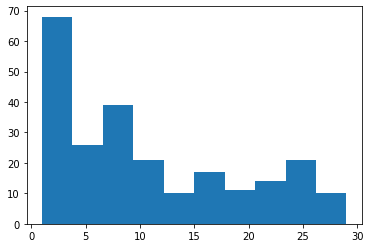

In [18]:
plt.hist(df_attr_yes.DistanceFromHome)

# Applying Ttest_independant on DistanceFromHome And Attrition

In [20]:
from scipy.stats import ttest_ind
stats,p = ttest_ind(df_attr_yes.DistanceFromHome,df_attr_no.DistanceFromHome)
print("\n",stats,p)
if p<0.05:
    print("Reject H0")
else:
    print("\nAccept H0")


 2.994708098265125 0.0027930600802134266
Reject H0


Hence After Applying Both Mann-Whitney And Ttest,
We got the result that there is significant Difference in Distance_fromHome of the People who left and the people who Stayed

# Education and Attrition

In [23]:
df.Education.unique() #Hence Education is a categorical Variable

array([2, 1, 4, 3, 5], dtype=int64)

H0: There is no Dependancy between Education And Attrition

H1: There is Dependancy between Education And Attrition

Chi Square Test (To check Dependancy Between two categorical Variables)

In [24]:
chi_table = pd.crosstab(df.Attrition,df.Education)
print(chi_table)

stats , p,dof,expected = chi2_contingency(chi_table)

print("\n",stats,p)
if p<0.05:
    print("Reject H0")
else:
    print("\nAccept H0")

Education    1    2    3    4   5
Attrition                        
0          139  238  473  340  43
1           31   44   99   58   5

 3.0739613982367193 0.5455253376565949

Accept H0


H0: There is no Dependancy between Education And Attrition

# Number Of Companies Worked And Attrition

In [25]:
df.NumCompaniesWorked.unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

(array([197., 521., 146., 159., 139.,  63.,  70.,  74.,  49.,  52.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

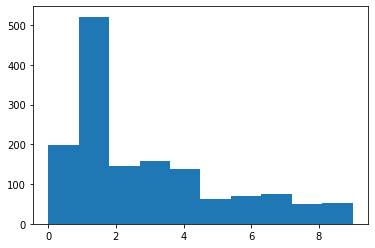

In [26]:
plt.hist(df.NumCompaniesWorked)

In [27]:
chi_table = pd.crosstab(df.Attrition,df.NumCompaniesWorked)
print(chi_table)
stats , p,dof,expected = chi2_contingency(chi_table)
print("\n",stats,p)
if p<0.05:
    print("Reject H0")
else:
    print("\nAccept H0")

NumCompaniesWorked    0    1    2    3    4   5   6   7   8   9
Attrition                                                      
0                   174  423  130  143  122  47  54  57  43  40
1                    23   98   16   16   17  16  16  17   6  12

 25.74440441715132 0.002249178294685049
Reject H0


In [28]:
stats,p = mannwhitneyu(df_attr_yes.NumCompaniesWorked,df_attr_no.NumCompaniesWorked)
print(stats,p)
if p<0.05:
    print("Reject H0")
else:
    print("Accept H0")

139291.5 0.12118252544058267
Accept H0
